In [1]:
import scipy.io.wavfile
import numpy as np

rate,audioData = scipy.io.wavfile.read("files/liga0.wav")

print(rate)
print(audioData)

44100
[[  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -3.05175781e-05]
 ..., 
 [ -9.15527344e-05  -6.10351562e-05]
 [ -3.05175781e-05  -3.05175781e-05]
 [  3.05175781e-05   3.05175781e-05]]


C:\Users\danie\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


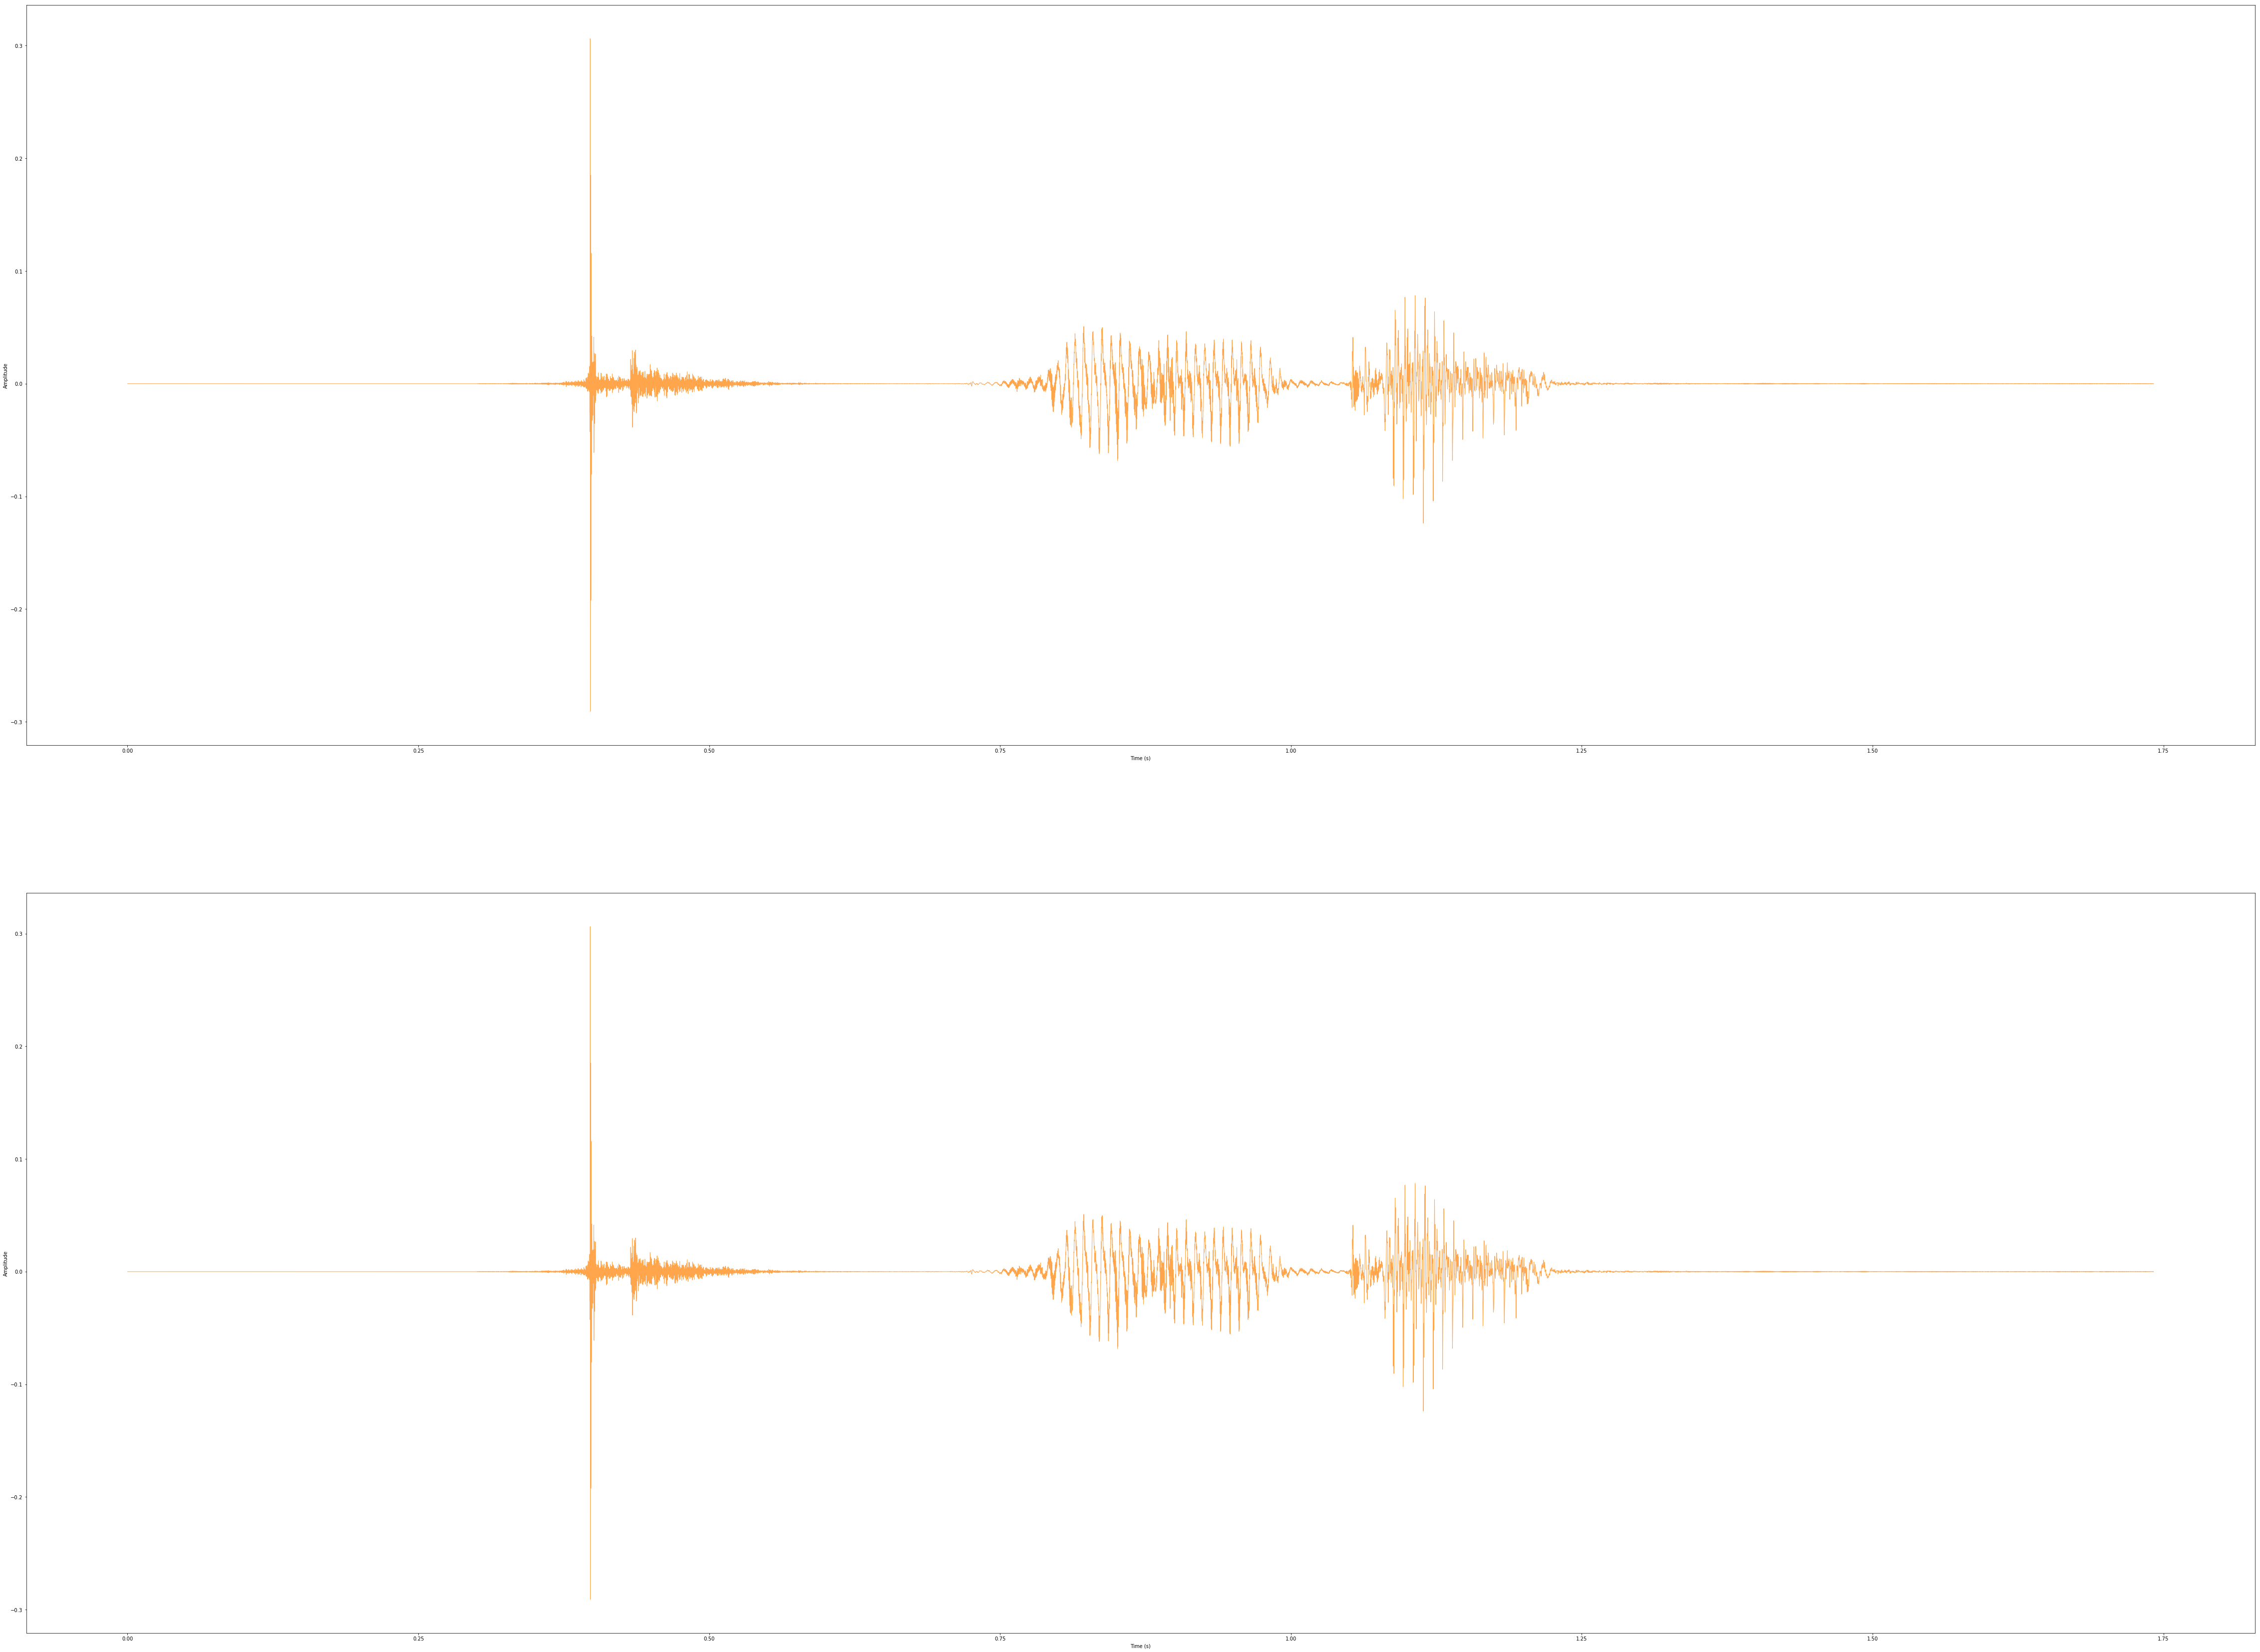

In [2]:
leftChannel  = audioData[:,0]
rightChannel = audioData[:,1]

import matplotlib.pyplot as plt


time = np.arange(0, float(audioData.shape[0]), 1) / rate 


plt.figure(1, figsize=(80, 60))
plt.subplot(211)
plt.plot(time, leftChannel, linewidth=1, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, rightChannel, linewidth=1, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Ok, but we want the frequency!
The idea is now to use a Fourier Transform (which, quite frankly, it has been a loooong time since I've used it) to create the multiple waves that make up the sound. Each frequency wave will then be analyzed

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


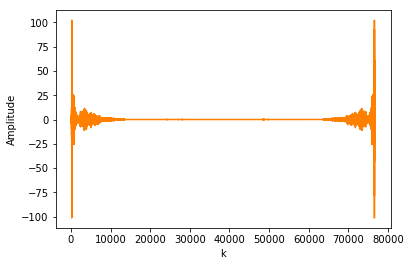

In [3]:
from numpy import fft as fft
fourier = fft.fft(leftChannel)

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.show()

We don't need the imaginary part, so we can get half the solution

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


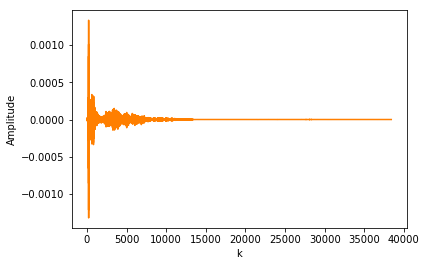

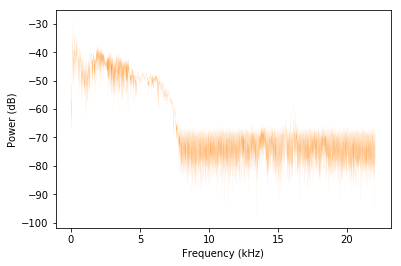

(38400,)


In [4]:
n = len(leftChannel)
if (n%2):
    n = n - 1

fourier = fourier[0:int((n/2))]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n) 
plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.show()

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.show()
print(freqArray.shape)

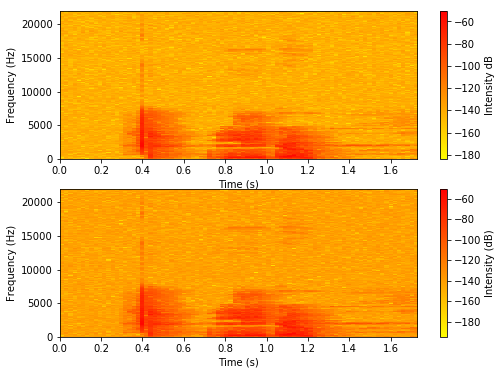

In [5]:
plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(leftChannel, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(rightChannel, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')
plt.show()

In [6]:
print(Pxx.shape)

(513, 85)
